In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from keras import layers, models

In [3]:
# Load the diabetes dataset
data = pd.read_csv("diabetes.csv")  # Replace with the correct path if necessary

# Separate features (X) and target (y)
X = data.drop("Outcome", axis=1).values
y = data["Outcome"].values 

In [5]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X = scaler.fit_transform(X)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Initialize a Sequential model
model = models.Sequential()

# Add a dense layer with 10 neurons, ReLU activation, and input shape matching the number of features
model.add(layers.Dense(10, activation='relu', input_shape=(X.shape[1],)))

# Add the output dense layer with 1 neuron (for binary classification) and sigmoid activation
model.add(layers.Dense(1, activation='sigmoid'))


C:\Users\Mouma\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Compile the model with the Adam optimizer, binary cross-entropy loss, and accuracy metric
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [27]:
# Train the model for 50 epochs on the training data
model.fit(X_train, y_train, epochs=50, batch_size=4, verbose=1)

Epoch 1/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7681 - loss: 0.4416
Epoch 2/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8169 - loss: 0.4058
Epoch 3/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8109 - loss: 0.4323
Epoch 4/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7725 - loss: 0.4580
Epoch 5/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7857 - loss: 0.4220
Epoch 6/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8010 - loss: 0.4110
Epoch 7/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7740 - loss: 0.4434
Epoch 8/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8172 - loss: 0.4104
Epoch 9/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8020 - loss: 0.4070
Epoch 10/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7967 - loss: 0.4183
Epoch 11/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8039 - loss: 0.4149
Epoch 12/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [29]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.7338


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


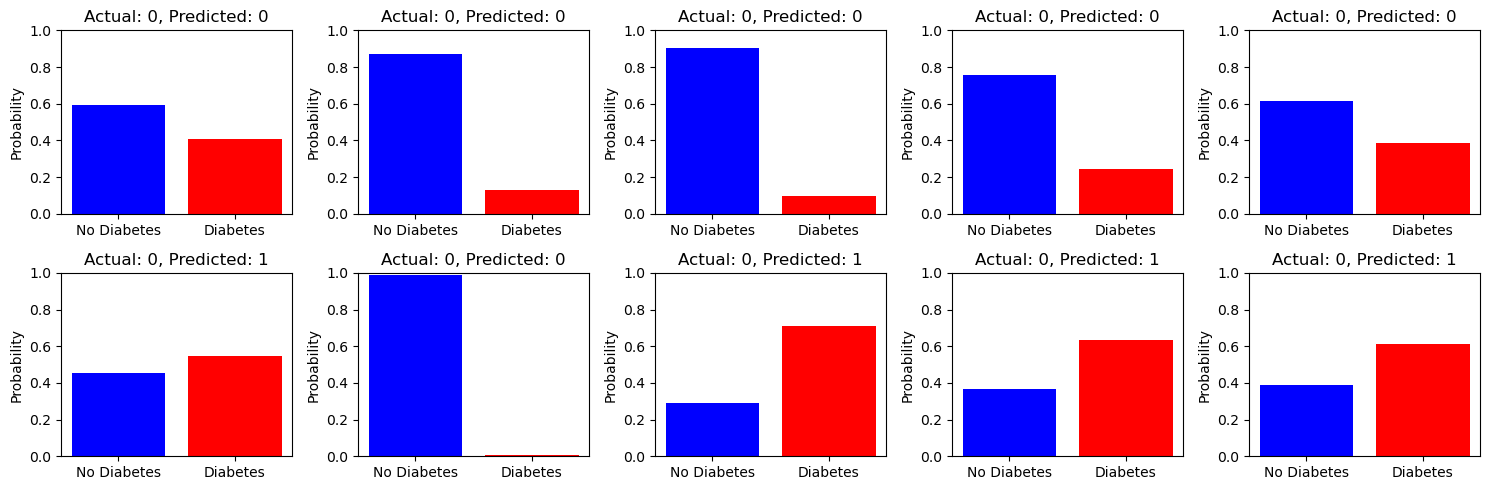

In [17]:
# Make predictions on the test set (output probabilities)
predictions = model.predict(X_test)

# Convert probabilities to binary predictions (0 or 1)
predicted_classes = (predictions > 0.5).astype(int).flatten()

# Visualize the predictions vs. actual outcomes
num_samples = 10  # Number of samples to visualize
plt.figure(figsize=(15, 5))

for i in range(num_samples):
    plt.subplot(2, 5, i + 1)
    plt.bar(['No Diabetes', 'Diabetes'], [1 - predictions[i][0], predictions[i][0]], color=['blue', 'red'])
    plt.title(f"Actual: {y_test[i]}, Predicted: {predicted_classes[i]}")
    plt.ylim(0, 1)
    plt.ylabel("Probability")

plt.tight_layout()
plt.show()
